In [12]:
import os, shutil
original_dataset_dir = 'dogs-vs-cats/train'
base_dir = 'dogs-vs-cats/small-dataset'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.6900 - acc: 0.5370 - val_loss: 0.6720 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 110s 1s/step - loss: 0.6562 - acc: 0.6040 - val_loss: 0.6492 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6064 - acc: 0.6665 - val_loss: 0.6085 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5574 - acc: 0.7210 - val_loss: 0.5824 - val_acc: 0.6970
Epoch 5/30
100/100 [==============================] - 104s 1s/step - loss: 0.5392 - acc: 0.7325 - val_loss: 0.6151 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 122s 1s/step - loss: 0.5100 - acc: 0.7525 - val_loss: 0.6010 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 120s 1s/step - loss: 0.4904 - acc: 0.7520 - val_loss: 0.5720 - val_acc: 0.6740
Epoch 8/30
100/100 [==============================] - 116s 1s/step - 

In [21]:
model.save('cats_and_dogs_small_1.h5')

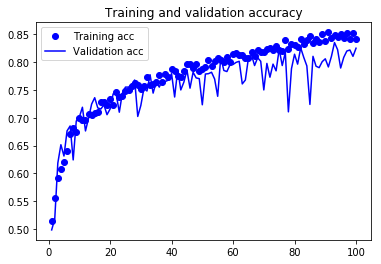

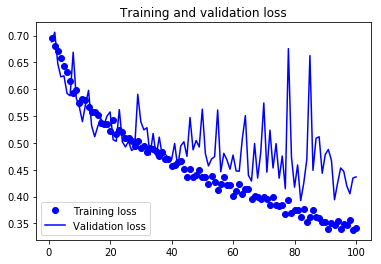

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

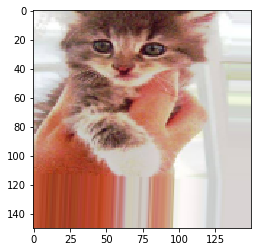

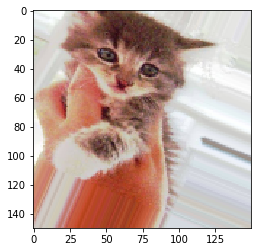

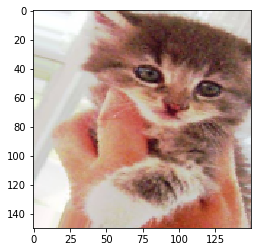

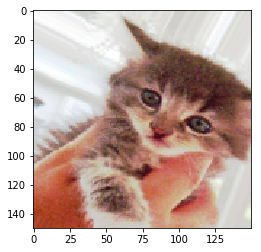

In [26]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 185s 2s/step - loss: 0.6948 - acc: 0.5150 - val_loss: 0.6883 - val_acc: 0.4987
Epoch 2/100
100/100 [==============================] - 182s 2s/step - loss: 0.6801 - acc: 0.5566 - val_loss: 0.7064 - val_acc: 0.5184
Epoch 3/100
100/100 [==============================] - 180s 2s/step - loss: 0.6701 - acc: 0.5947 - val_loss: 0.6474 - val_acc: 0.6187
Epoch 4/100
100/100 [==============================] - 192s 2s/step - loss: 0.6574 - acc: 0.6081 - val_loss: 0.6231 - val_acc: 0.6516
Epoch 5/100
100/100 [==============================] - 179s 2s/step - loss: 0.6432 - acc: 0.6206 - val_loss: 0.6251 - val_acc: 0.6313
Epoch 6/100
100/100 [==============================] - 176s 2s/step - loss: 0.6312 - acc: 0.6403 - val_loss: 0.5923 - val_acc: 0.6764
Epoch 7/100
100/100 [==============================] - 176s 2s/step - loss: 0.6152 - acc: 0.6697 - val_loss: 0.5

100/100 [==============================] - 198s 2s/step - loss: 0.4094 - acc: 0.8172 - val_loss: 0.4478 - val_acc: 0.7995
Epoch 62/100
100/100 [==============================] - 200s 2s/step - loss: 0.4242 - acc: 0.8134 - val_loss: 0.4472 - val_acc: 0.8014
Epoch 63/100
100/100 [==============================] - 198s 2s/step - loss: 0.4057 - acc: 0.8119 - val_loss: 0.5072 - val_acc: 0.7608
Epoch 64/100
100/100 [==============================] - 201s 2s/step - loss: 0.4145 - acc: 0.8072 - val_loss: 0.5509 - val_acc: 0.7678
Epoch 65/100
100/100 [==============================] - 201s 2s/step - loss: 0.4133 - acc: 0.8072 - val_loss: 0.4397 - val_acc: 0.8071
Epoch 66/100
100/100 [==============================] - 198s 2s/step - loss: 0.3945 - acc: 0.8178 - val_loss: 0.4289 - val_acc: 0.8128
Epoch 67/100
100/100 [==============================] - 198s 2s/step - loss: 0.3997 - acc: 0.8109 - val_loss: 0.4989 - val_acc: 0.7938
Epoch 68/100
100/100 [==============================] - 199s 2s/step

In [29]:
model.save('cats_and_dogs_small_2.h5')


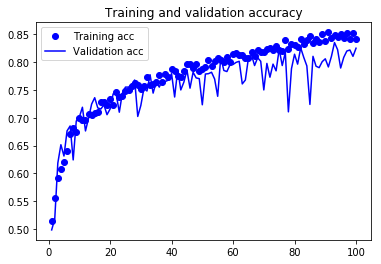

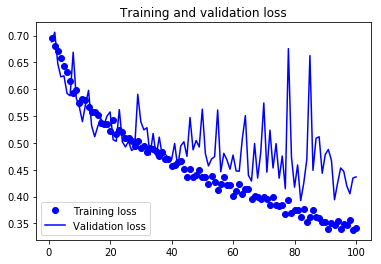

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Using a pre trained convolutional network! VGG16, is one of the most commonly used imagenets.

In [34]:
from tensorflow.keras.applications import VGG16

In [36]:
conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape = (150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [48]:
import numpy as np

datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150,150),
        batch_size = batch_size,
        class_mode = 'binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features, labels

In [49]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [55]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='binary_crossentropy',
            metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(train_features, train_labels,
                epochs=30,
                batch_size=20,
                validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6235 - acc: 0.6540 - val_loss: 0.4644 - val_acc: 0.8100
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4453 - acc: 0.7955 - val_loss: 0.3788 - val_acc: 0.8720
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3644 - acc: 0.8485 - val_loss: 0.3334 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3124 - acc: 0.8765 - val_loss: 0.3149 - val_acc: 0.8680
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2899 - acc: 0.8765 - val_loss: 0.2895 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2590 - acc: 0.8985 - val_loss: 0.2753 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2489 - acc: 0.9070 - val_loss: 0.2655 - val_acc: 0.9030
Epoch 8/30
200

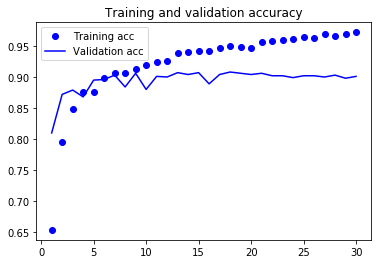

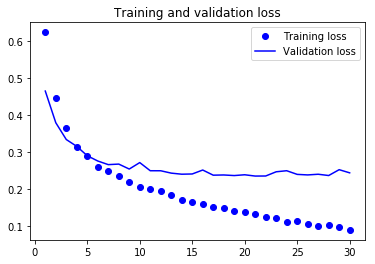

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With Data Augmentation, the model is overfitting. We need to use data augmentation.

In [58]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [61]:
print('No. of trainable weights in the conv_base:', len(model.trainable_weights))

No. of trainable weights in the conv_base: 30


In [62]:
conv_base.trainable = False

In [63]:
print('No. of trainable weights in the conv_base after freezing:', len(model.trainable_weights))

No. of trainable weights in the conv_base after freezing: 4


Using the same augmentation for train data

In [65]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# test data is not augemented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 607s 6s/step - loss: 0.4648 - acc: 0.7835 - val_loss: 0.3444 - val_acc: 0.8780
Epoch 2/30
100/100 [==============================] - 574s 6s/step - loss: 0.4258 - acc: 0.8110 - val_loss: 0.3271 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 568s 6s/step - loss: 0.4138 - acc: 0.8130 - val_loss: 0.2975 - val_acc: 0.8920
Epoch 4/30
100/100 [==============================] - 572s 6s/step - loss: 0.3719 - acc: 0.8360 - val_loss: 0.2818 - val_acc: 0.8990
Epoch 5/30
100/100 [==============================] - 572s 6s/step - loss: 0.3625 - acc: 0.8445 - val_loss: 0.2727 - val_acc: 0.9010
Epoch 6/30
100/100 [==============================] - 570s 6s/step - loss: 0.3601 - acc: 0.8415 - val_loss: 0.2664 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 570s 6s/step - loss: 0.3497 - acc: 0.8555 - val_loss: 0.2636 - v

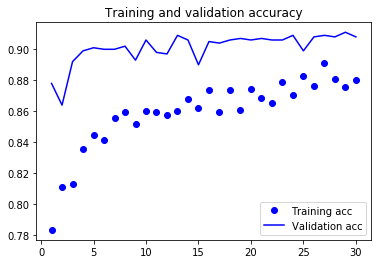

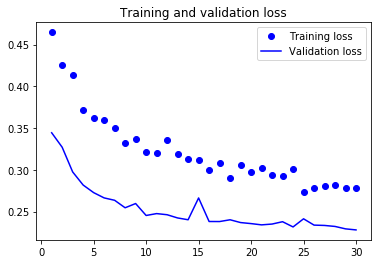

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [68]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [69]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])
history = model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 632s 6s/step - loss: 0.2938 - acc: 0.8665 - val_loss: 0.2090 - val_acc: 0.9160
Epoch 2/100
100/100 [==============================] - 628s 6s/step - loss: 0.2547 - acc: 0.8835 - val_loss: 0.2090 - val_acc: 0.9190
Epoch 3/100
100/100 [==============================] - 635s 6s/step - loss: 0.2370 - acc: 0.9005 - val_loss: 0.2151 - val_acc: 0.9180
Epoch 4/100
100/100 [==============================] - 623s 6s/step - loss: 0.2182 - acc: 0.9070 - val_loss: 0.1977 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 627s 6s/step - loss: 0.2127 - acc: 0.9145 - val_loss: 0.2038 - val_acc: 0.9230
Epoch 6/100
100/100 [==============================] - 614s 6s/step - loss: 0.1954 - acc: 0.9145 - val_loss: 0.2442 - val_acc: 0.8990
Epoch 7/100
100/100 [==============================] - 616s 6s/step - loss: 0.1811 - acc: 0.9270 - val_loss: 0.2234 - val_acc: 0.9150
Epoch 8/100
100/100 [==============================] - 618s 6s

Epoch 62/100
100/100 [==============================] - 623s 6s/step - loss: 0.0288 - acc: 0.9885 - val_loss: 0.2280 - val_acc: 0.9350
Epoch 63/100
100/100 [==============================] - 627s 6s/step - loss: 0.0314 - acc: 0.9865 - val_loss: 0.2198 - val_acc: 0.9400
Epoch 64/100
100/100 [==============================] - 628s 6s/step - loss: 0.0285 - acc: 0.9900 - val_loss: 0.2566 - val_acc: 0.9390
Epoch 65/100
100/100 [==============================] - 630s 6s/step - loss: 0.0319 - acc: 0.9895 - val_loss: 0.2496 - val_acc: 0.9370
Epoch 66/100
100/100 [==============================] - 630s 6s/step - loss: 0.0356 - acc: 0.9880 - val_loss: 0.6896 - val_acc: 0.8920
Epoch 67/100
100/100 [==============================] - 625s 6s/step - loss: 0.0384 - acc: 0.9870 - val_loss: 0.2431 - val_acc: 0.9320
Epoch 68/100
100/100 [==============================] - 626s 6s/step - loss: 0.0245 - acc: 0.9900 - val_loss: 0.2828 - val_acc: 0.9380
Epoch 69/100
100/100 [==============================] -

Fine Tuning, a technique complementary to feature extraction. It is done by unfreezing a few of the top layers of a frozen model base (used for feature extraction) and training it with top added layers.

In [70]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [71]:
# Freezing all layers upto block5_conv1
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [72]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 661s 7s/step - loss: 0.0221 - acc: 0.9915 - val_loss: 0.2716 - val_acc: 0.9370
Epoch 2/100
100/100 [==============================] - 625s 6s/step - loss: 0.0198 - acc: 0.9930 - val_loss: 0.3158 - val_acc: 0.9400
Epoch 3/100
100/100 [==============================] - 615s 6s/step - loss: 0.0338 - acc: 0.9885 - val_loss: 0.3703 - val_acc: 0.9330
Epoch 4/100
100/100 [==============================] - 614s 6s/step - loss: 0.0219 - acc: 0.9920 - val_loss: 0.2333 - val_acc: 0.9380
Epoch 5/100
100/100 [==============================] - 613s 6s/step - loss: 0.0222 - acc: 0.9910 - val_loss: 0.3152 - val_acc: 0.9320
Epoch 6/100
100/100 [==============================] - 618s 6s/step - loss: 0.0140 - acc: 0.9955 - val_loss: 0.3080 - val_acc: 0.9340
Epoch 7/100
100/100 [==============================] - 617s 6s/step - loss: 0.0152 - acc: 0.9940 - val_loss: 0.2748 - val_acc: 0.9390
Epoch 8/100
100/100 [==============================] - 614s 6s

Epoch 62/100
100/100 [==============================] - 621s 6s/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.3754 - val_acc: 0.9380
Epoch 63/100
100/100 [==============================] - 620s 6s/step - loss: 0.0066 - acc: 0.9970 - val_loss: 0.3973 - val_acc: 0.9370
Epoch 64/100
100/100 [==============================] - 623s 6s/step - loss: 0.0062 - acc: 0.9975 - val_loss: 0.4257 - val_acc: 0.9430
Epoch 65/100
100/100 [==============================] - 619s 6s/step - loss: 0.0098 - acc: 0.9955 - val_loss: 0.3386 - val_acc: 0.9420
Epoch 66/100
100/100 [==============================] - 617s 6s/step - loss: 0.0148 - acc: 0.9970 - val_loss: 0.3096 - val_acc: 0.9420
Epoch 67/100
100/100 [==============================] - 618s 6s/step - loss: 0.0082 - acc: 0.9965 - val_loss: 0.2847 - val_acc: 0.9400
Epoch 68/100
100/100 [==============================] - 617s 6s/step - loss: 0.0082 - acc: 0.9975 - val_loss: 0.4261 - val_acc: 0.9270
Epoch 69/100
100/100 [==============================] -

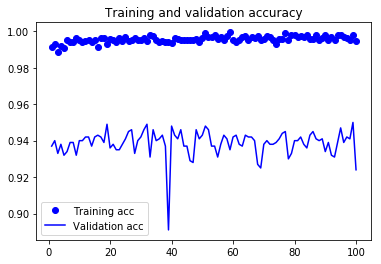

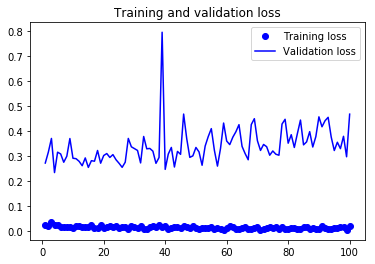

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Smoothing the plot

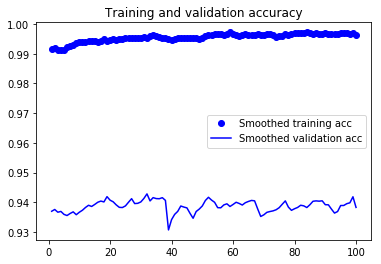

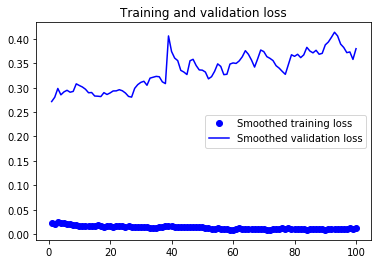

In [75]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
    smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
    smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
    smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
    smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Evaluation of model on test data

In [76]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.931999992132


In [77]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

Preprocessing a single image

In [79]:
img_path = 'dogs-vs-cats/small-dataset/test/cats/cat.1700.jpg'

from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print("Image tensor shape:", img_tensor.shape)

Image tensor shape: (1, 150, 150, 3)


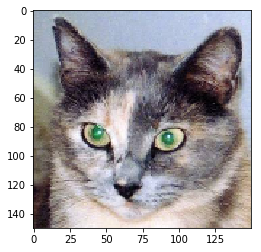

In [80]:
plt.imshow(img_tensor[0])
plt.show()

In [81]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [82]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


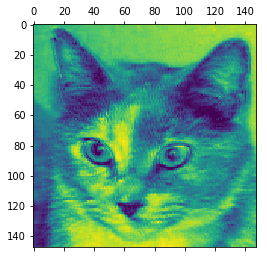

In [83]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Visualizing every channel in every intermediate activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


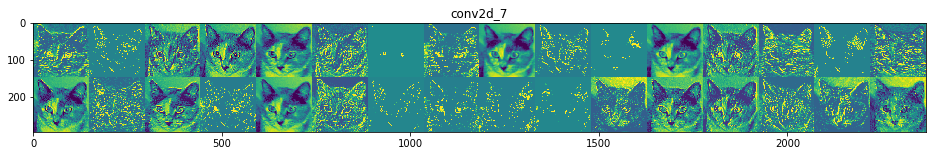

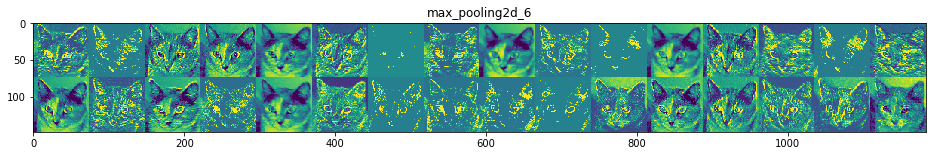

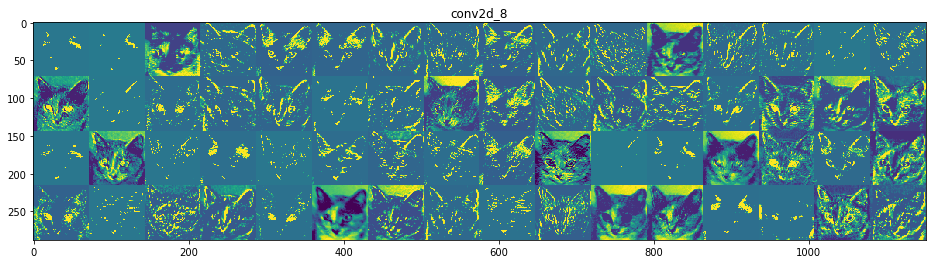

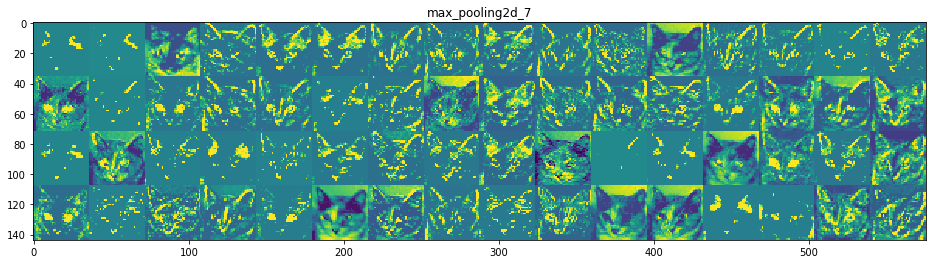

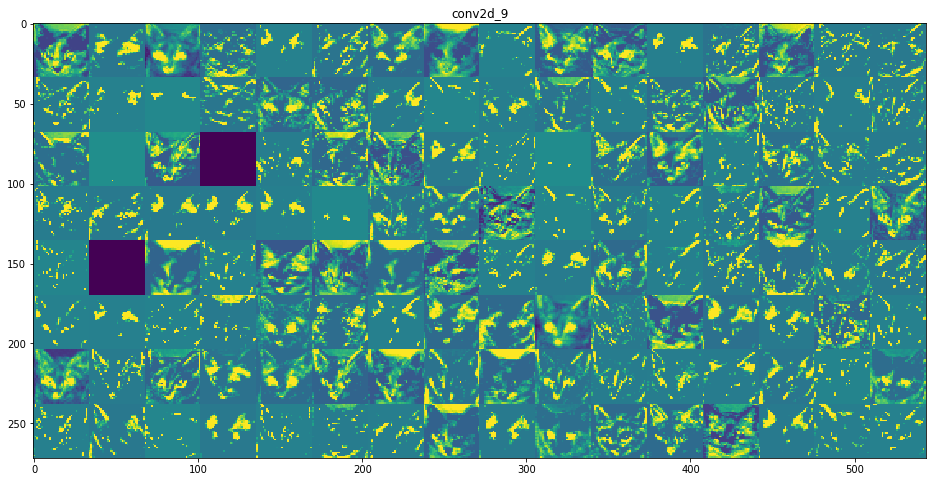

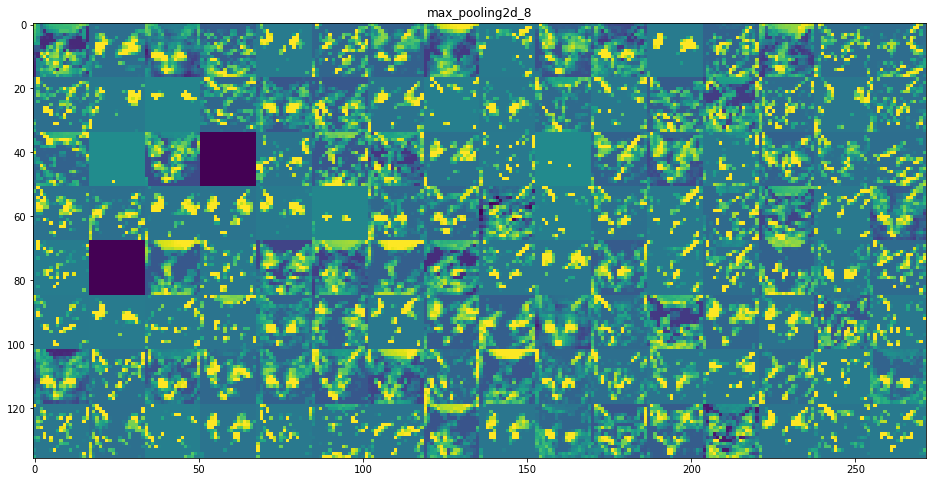

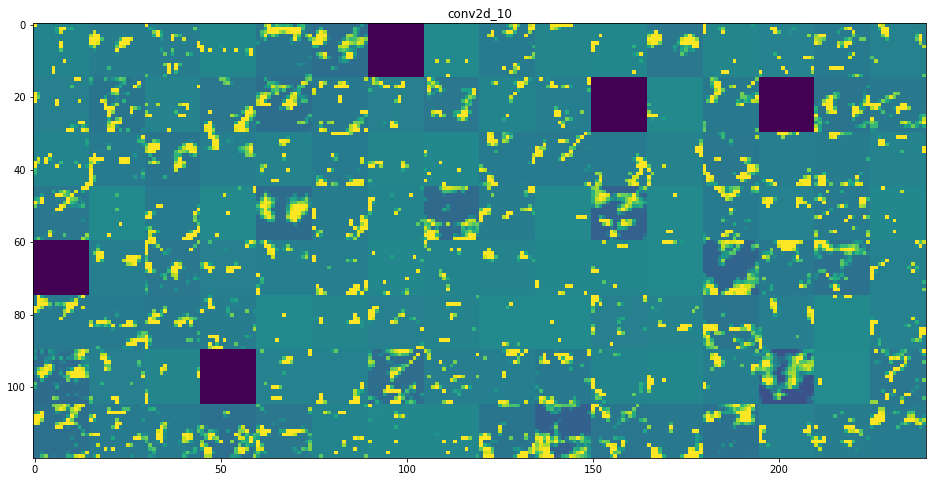

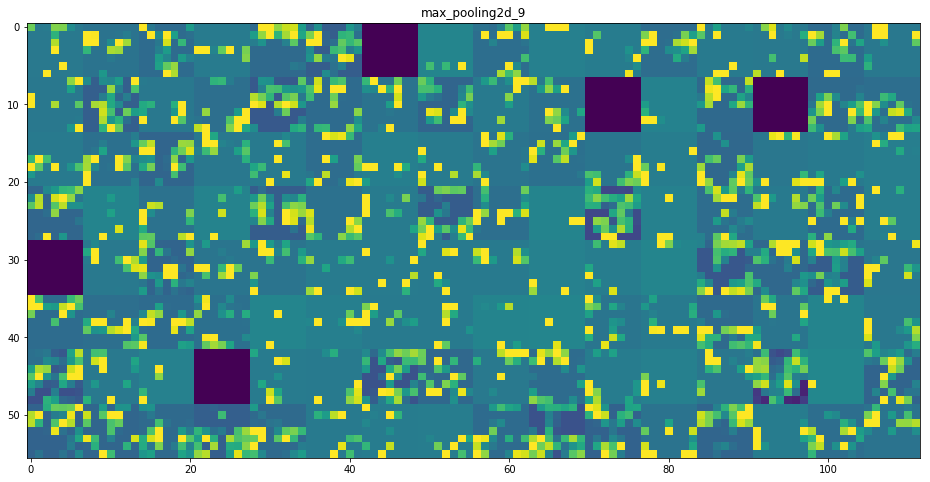

In [84]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                    row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')